In [1]:
with open("load_macro_data.py") as f:
    exec(f.read())


In [2]:
from mchmm.indep_hmm_initializer.initializer_func import initializer_generator
from mchmm import FullMCHMM

2023-05-02 14:50:20.369072: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model_dict2 = {}
margin_initializer2, hmm_initializer2, initializer_model2 \
                                = initializer_generator(2, data)
print('Finish fitting initializer...')
model = FullMCHMM(k=1, num_states=2,
                margin_initializer=margin_initializer2,
                hmm_initializer=hmm_initializer2)
model.neg_log_likelihood(data)
model.fit(data, display=True, max_iter=500)

Finish fitting initializer...
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...


Fitting the between-regime serial dependence correlation...


In [6]:
_invtrans_rho_parameters(model.variables[-3])

<tf.Tensor: shape=(4, 2, 1), dtype=float64, numpy=
array([[[ 0.32662924],
        [ 0.08652028]],

       [[-0.07199724],
        [-0.2948539 ]],

       [[ 0.52275244],
        [ 0.12667259]],

       [[ 0.16317537],
        [-0.16067952]]])>

In [8]:
_invtrans_rho_parameters(model.variables[-2])

<tf.Tensor: shape=(2, 6), dtype=float64, numpy=
array([[-0.02326   ,  0.32398773,  0.14689357,  0.10169741,  0.19688299,
         0.19154314],
       [ 0.13585426,  0.31455745,  0.15543666,  0.22494569,  0.1258615 ,
         0.14582153]])>

In [4]:
model_dict2 = {}
margin_initializer2, hmm_initializer2, initializer_model2 \
                                = initializer_generator(2, data)
print('Finish fitting initializer...')
for k in range(5):
    if k > 0:
        model = FullMCHMM(k=k, num_states=2,
                margin_initializer=margin_initializer2,
                hmm_initializer=hmm_initializer2)
        model.neg_log_likelihood(data)
        model.fit(data, display=True, max_iter=500)
    else:
        model = FullMCHMM(k=1, num_states=2,
                margin_initializer=margin_initializer2,
                hmm_initializer=hmm_initializer2)
        model.neg_log_likelihood(data)
        model.fit(data, serial_correlated=False, display=True, max_iter=500)
    model_dict2[k] = model

Finish fitting initializer...
Fitting the cross-sectional correlation...
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...


In [5]:
model_dict3 = {}
margin_initializer3, hmm_initializer3, initializer_model3 \
                                = initializer_generator(3, data)
print('Finish fitting initializer...')
for k in range(5):
    if k > 0:
        model = FullMCHMM(k=k, num_states=3,
                margin_initializer=margin_initializer3,
                hmm_initializer=hmm_initializer3)
        model.neg_log_likelihood(data)
        model.fit(data, display=True, max_iter=500)
    else:
        model = FullMCHMM(k=1, num_states=3,
                margin_initializer=margin_initializer3,
                hmm_initializer=hmm_initializer3)
        model.neg_log_likelihood(data)
        model.fit(data, serial_correlated=False, display=True, max_iter=500)
    model_dict3[k] = model

Finish fitting initializer...
Fitting the cross-sectional correlation...
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...
Fitting the within-regime serial dependence...
Fitting the cross-sectional correlation...
Fitting the between-regime serial dependence correlation...


In [7]:
from tabulate import tabulate
table_likelihood = [
    ['Markov order'] + [str(i) for i in range(5)],
    [r'2 regimes'] + [model.monitor.loglik for model in list(model_dict2.values())],
    [r'3 regimes'] + [model.monitor.loglik for model in list(model_dict3.values())]
]
table_aic = [
    ['Markov order'] + [str(i) for i in range(5)],
    [r'2 regimes'] + [model.monitor.aic() for model in list(model_dict2.values())],
    [r'3 regimes'] + [model.monitor.aic() for model in list(model_dict3.values())]
]
table_bic = [
    ['Markov order'] + [str(i) for i in range(5)],
    [r'2 regimes'] + [model.monitor.bic() for model in list(model_dict2.values())],
    [r'3 regimes'] + [model.monitor.bic() for model in list(model_dict3.values())]
]

In [24]:
print('Table of likelihood values:')
print(tabulate(table_likelihood[1:], table_likelihood[0], tablefmt="github"))
print('\nTable of AIC values:')
print(tabulate(table_aic[1:], table_aic[0], tablefmt="latex"))
print('\nTable of BIC values:')
print(tabulate(table_bic[1:], table_bic[0], tablefmt="github"))

Table of likelihood values:
| Markov order   |        0 |        1 |        2 |        3 |        4 |
|----------------|----------|----------|----------|----------|----------|
| 2 regimes      | -1889.9  | -1835.28 | -1816.9  | -1801.42 | -1796.28 |
| 3 regimes      | -1816.47 | -1756.03 | -1737.38 | -1723.85 | -1718.73 |

Table of AIC values:
\begin{tabular}{lrrrrr}
\hline
 Markov order   &       0 &       1 &       2 &       3 &       4 \\
\hline
 2 regimes      & 3897.81 & 3788.56 & 3767.8  & 3752.84 & 3758.56 \\
 3 regimes      & 3812.93 & 3692.07 & 3678.75 & 3675.7  & 3689.46 \\
\hline
\end{tabular}

Table of BIC values:
| Markov order   |       0 |       1 |       2 |       3 |       4 |
|----------------|---------|---------|---------|---------|---------|
| 2 regimes      | 4166.74 | 4057.49 | 4073.19 | 4094.71 | 4136.89 |
| 3 regimes      | 4223.17 | 4102.3  | 4143.69 | 4195.34 | 4263.79 |


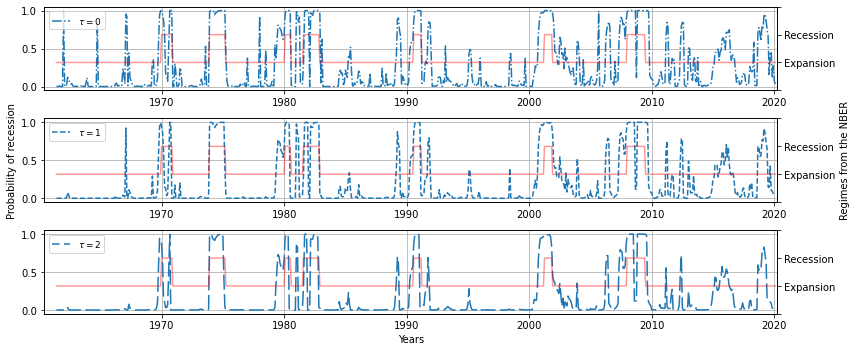

In [23]:
import matplotlib.pyplot as plt
p1 = model_dict2[3].inference_module.smooth_predict(1)[:,0]
p2 = model_dict2[3].inference_module.smooth_predict(2)[:,0,0]
p3 = model_dict2[3].inference_module.smooth_predict(3)[:,0,0,0]

fig, axs = plt.subplots(nrows=3, figsize=(12,5))
line0 = axs[0].plot(date_index, p1, label=r'$\tau=0$', linestyle='-.')
line1 = axs[1].plot(date_index[:-1], p2, label=r'$\tau=1$', linestyle='--')
line2 = axs[2].plot(date_index[:-2], p3, label=r'$\tau=2$', linestyle=(5, (10, 3)))
for i, ax in enumerate(axs):
    tax = ax.twinx()
    line3 = tax.plot(date_index, 1-latent_seq, color='red', alpha=0.4, label='True regimes')
    tax.set(ylim=[-1,2], 
            yticks=[-1,0,1,2],
            yticklabels=[None, 'Expansion', 'Recession', None])
    if i==1: 
        tax.set_ylabel('Regimes from the NBER')
        ax.set_ylabel('Probability of recession')
    if i==2: ax.set_xlabel('Years')
    ax.grid()
    ax.set_xlim([-3500, 18350])
    ax.legend(loc=2, fontsize=9)
fig.tight_layout()
fig.savefig('simulation_plots//two_regimes_probs.pdf')

<AxesSubplot:xlabel='DATE'>

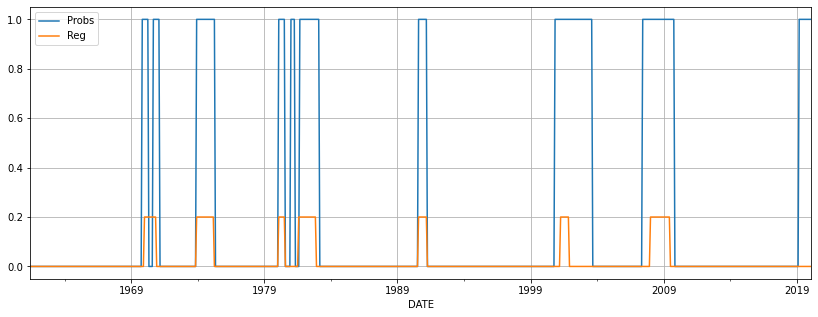

In [35]:
prediction = model_dict2[3].inference_module.get_inferred_latent(l=1, cl=3, cp=0.8)
df0 = pd.DataFrame({'Probs':1-prediction, 
                   'Reg':(1-latent_seq)*0.2},
                   index=date_index)
df0.plot(figsize=(14,5), grid=True)

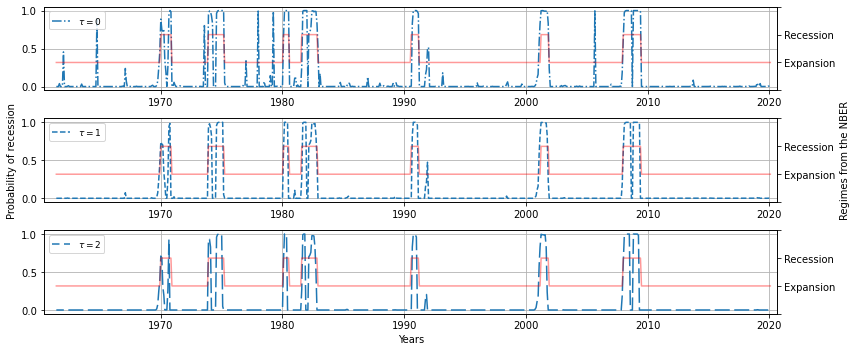

In [22]:
import matplotlib.pyplot as plt
p1 = model_dict3[3].inference_module.smooth_predict(1)[:,0]
p2 = model_dict3[3].inference_module.smooth_predict(2)[:,0,0]
p3 = model_dict3[3].inference_module.smooth_predict(3)[:,0,0,0]

fig, axs = plt.subplots(nrows=3, figsize=(12,5))
line0 = axs[0].plot(date_index, p1, label=r'$\tau=0$', linestyle='-.')
line1 = axs[1].plot(date_index[:-1], p2, label=r'$\tau=1$', linestyle='--')
line2 = axs[2].plot(date_index[:-2], p3, label=r'$\tau=2$', linestyle=(5, (10, 3)))
for i, ax in enumerate(axs):
    tax = ax.twinx()
    line3 = tax.plot(date_index, 1-latent_seq, color='red', alpha=0.4, label='True regimes')
    tax.set(ylim=[-1,2], 
            yticks=[-1,0,1,2],
            yticklabels=[None, 'Expansion', 'Recession', None])
    if i==1: 
        tax.set_ylabel('Regimes from the NBER')
        ax.set_ylabel('Probability of recession')
    if i==2: ax.set_xlabel('Years')
    ax.grid()
    ax.set_xlim([-3500, 18500])
    ax.legend(loc=2, fontsize=9)
fig.tight_layout()
fig.savefig('simulation_plots//three_regimes_probs.pdf')

<AxesSubplot:xlabel='DATE'>

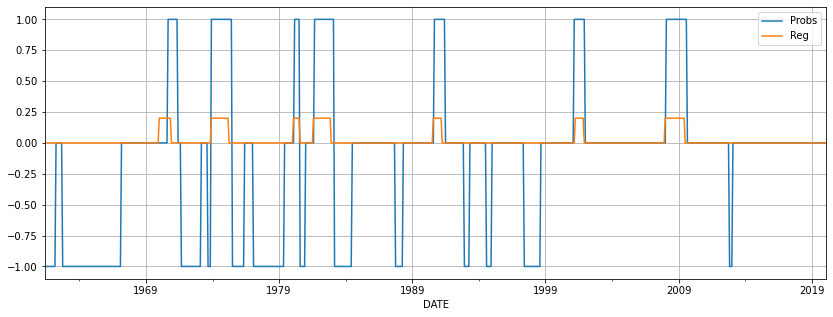

In [37]:
prediction = model_dict3[3].inference_module.get_inferred_latent(l=1, cl=3, cp=0.8)
df0 = pd.DataFrame({'Probs':1-prediction, 
                   'Reg':(1-latent_seq)*0.2},
                   index=date_index)
df0.plot(figsize=(14,5), grid=True)

In [18]:
variables_model2 = model_dict2[3].variables
variables_model3 = model_dict3[3].variables
%store variables_model2
%store variables_model3

Stored 'variables_model2' (list)
Stored 'variables_model3' (list)
